**201: EKMEK Ürünü, X12 Veriseti, Single-Output Multi-Layer MLP Modelleme**  
TRAIN

Amaç: EKMEK ürünü için miktar tahmini yapmak.

Girdi:  
- X1_train_EKMEK.npy → Fiyat, lag, rolling mean  
- X2_train_EKMEK.npy → Saat, gün, haftanın günü, hafta sonu bilgisi

Çıktı: EKMEK ürünü için miktar tahmini.

Model: 3 gizli katmanlı, elle yazılmış MLP  
- Katman 1: X1
- Katman 2: Katman1 çıktısı + X2
- Katman 3: Katman2 çıktısı

Aktivasyon: ReLU

Kayıp Fonksiyonu: Mean Squared Error (MSE)

Optimizasyon: El yazması geri yayılım (backpropagation) + Mini Batch + Early Stopping

Çıktılar:  
- Eğitim & test verileri üzerinden MSE öğrenme eğrisi (Learning Curve) çizilir.  
- En iyi ağırlıklar: `models/201_W1.npy` `201_b1.npy` … `201_W4.npy` `201_b4.npy` dosyalarına kaydedilir.

1- KÜTÜPHANE & VERİ YÜKLEME

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

X1_train = np.load('npy/X1_train_EKMEK.npy')
X2_train = np.load('npy/X2_train_EKMEK.npy')
y_train  = np.load('npy/y_train_EKMEK_miktar.npy')

X1_test = np.load('npy/X1_test_EKMEK.npy')
X2_test = np.load('npy/X2_test_EKMEK.npy')
y_test  = np.load('npy/y_test_EKMEK_miktar.npy')

X1_mean = X1_train.mean(axis=0)
X1_std  = X1_train.std(axis=0)
X1_train_scaled = (X1_train - X1_mean) / X1_std
X1_test_scaled  = (X1_test - X1_mean) / X1_std

if not os.path.exists('models'):
    os.makedirs('models')

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)


2- GRID SEARCH PARAMETRELERİ

In [7]:
hidden_dim1_list = [32]
hidden_dim2_list = [16]
hidden_dim3_list = [16]
lr_list = [0.01]
batch_size_list = [64]

epochs = 50
patience = 7

best_mse_global = float('inf')
best_config = None


3- GRID SEARCH DÖNGÜSÜ


Deneme: hd1=32, hd2=8, hd3=8, lr=0.005, batch_size=32
Epoch 1/50 | Train MSE: 2.6057 | Test MSE: 2.6256
Epoch 2/50 | Train MSE: 2.5995 | Test MSE: 2.6180
Epoch 3/50 | Train MSE: 2.5514 | Test MSE: 2.5740
Epoch 4/50 | Train MSE: 2.5106 | Test MSE: 2.5317
Epoch 5/50 | Train MSE: 2.4927 | Test MSE: 2.5142
Epoch 6/50 | Train MSE: 2.5000 | Test MSE: 2.5249
Epoch 7/50 | Train MSE: 2.4767 | Test MSE: 2.5019
Epoch 8/50 | Train MSE: 2.4819 | Test MSE: 2.5045
Epoch 9/50 | Train MSE: 2.4910 | Test MSE: 2.5246
Epoch 10/50 | Train MSE: 2.4778 | Test MSE: 2.5013
Epoch 11/50 | Train MSE: 2.4795 | Test MSE: 2.5034
Epoch 12/50 | Train MSE: 2.4966 | Test MSE: 2.5191
Epoch 13/50 | Train MSE: 2.4744 | Test MSE: 2.4977
Epoch 14/50 | Train MSE: 2.4748 | Test MSE: 2.5030
Epoch 15/50 | Train MSE: 2.4769 | Test MSE: 2.4991
Epoch 16/50 | Train MSE: 2.4741 | Test MSE: 2.5021
Epoch 17/50 | Train MSE: 2.4785 | Test MSE: 2.5012
Epoch 18/50 | Train MSE: 2.4872 | Test MSE: 2.5108
Epoch 19/50 | Train MSE: 2.4758 | Te

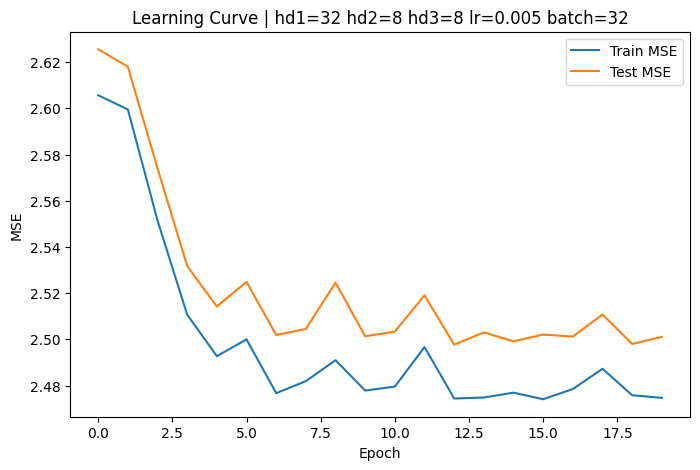


Deneme: hd1=32, hd2=8, hd3=8, lr=0.005, batch_size=64
Epoch 1/50 | Train MSE: 2.6260 | Test MSE: 2.6461
Epoch 2/50 | Train MSE: 2.6058 | Test MSE: 2.6257
Epoch 3/50 | Train MSE: 2.6197 | Test MSE: 2.6408
Epoch 4/50 | Train MSE: 2.5786 | Test MSE: 2.5986
Epoch 5/50 | Train MSE: 2.5098 | Test MSE: 2.5317
Epoch 6/50 | Train MSE: 2.5237 | Test MSE: 2.5456
Epoch 7/50 | Train MSE: 2.4988 | Test MSE: 2.5216
Epoch 8/50 | Train MSE: 2.4853 | Test MSE: 2.5071
Epoch 9/50 | Train MSE: 2.4883 | Test MSE: 2.5154
Epoch 10/50 | Train MSE: 2.4804 | Test MSE: 2.5020
Epoch 11/50 | Train MSE: 2.4776 | Test MSE: 2.5016
Epoch 12/50 | Train MSE: 2.4936 | Test MSE: 2.5128
Epoch 13/50 | Train MSE: 2.4719 | Test MSE: 2.4968
Epoch 14/50 | Train MSE: 2.4708 | Test MSE: 2.4943
Epoch 15/50 | Train MSE: 2.4712 | Test MSE: 2.4906
Epoch 16/50 | Train MSE: 2.4643 | Test MSE: 2.4875
Epoch 17/50 | Train MSE: 2.4638 | Test MSE: 2.4857
Epoch 18/50 | Train MSE: 2.4779 | Test MSE: 2.5027
Epoch 19/50 | Train MSE: 2.4562 | Te

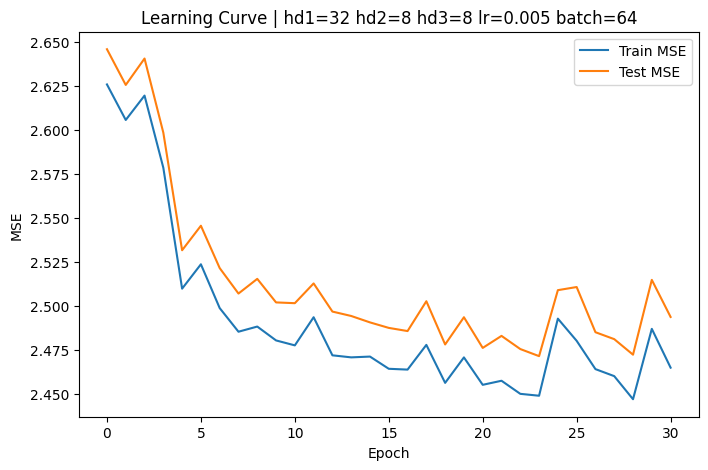


Deneme: hd1=32, hd2=8, hd3=8, lr=0.01, batch_size=32
Epoch 1/50 | Train MSE: 2.5904 | Test MSE: 2.6087
Epoch 2/50 | Train MSE: 2.5359 | Test MSE: 2.5625
Epoch 3/50 | Train MSE: 2.5345 | Test MSE: 2.5575
Epoch 4/50 | Train MSE: 2.5049 | Test MSE: 2.5261
Epoch 5/50 | Train MSE: 2.4861 | Test MSE: 2.5073
Epoch 6/50 | Train MSE: 2.4958 | Test MSE: 2.5178
Epoch 7/50 | Train MSE: 2.4843 | Test MSE: 2.5074
Epoch 8/50 | Train MSE: 2.4702 | Test MSE: 2.4908
Epoch 9/50 | Train MSE: 2.4787 | Test MSE: 2.5041
Epoch 10/50 | Train MSE: 2.4634 | Test MSE: 2.4840
Epoch 11/50 | Train MSE: 2.4785 | Test MSE: 2.5007
Epoch 12/50 | Train MSE: 2.5084 | Test MSE: 2.5366
Epoch 13/50 | Train MSE: 2.4569 | Test MSE: 2.4831
Epoch 14/50 | Train MSE: 2.4764 | Test MSE: 2.4986
Epoch 15/50 | Train MSE: 2.4666 | Test MSE: 2.4895
Epoch 16/50 | Train MSE: 2.4551 | Test MSE: 2.4794
Epoch 17/50 | Train MSE: 2.4672 | Test MSE: 2.4869
Epoch 18/50 | Train MSE: 2.4725 | Test MSE: 2.4966
Epoch 19/50 | Train MSE: 2.4473 | Tes

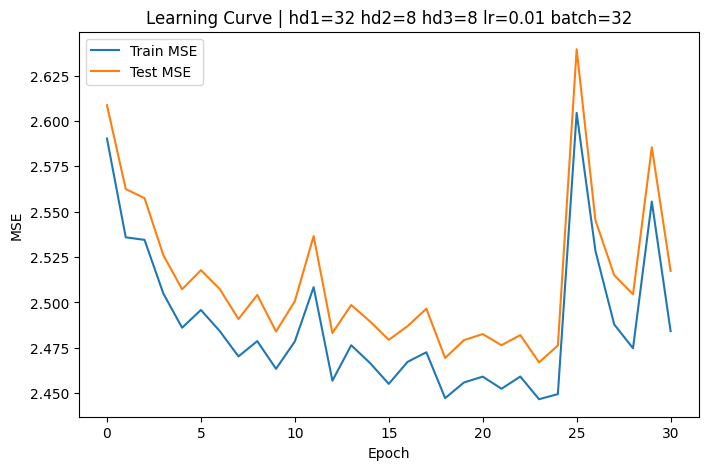


Deneme: hd1=32, hd2=8, hd3=8, lr=0.01, batch_size=64
Epoch 1/50 | Train MSE: 2.6049 | Test MSE: 2.6250
Epoch 2/50 | Train MSE: 2.5991 | Test MSE: 2.6176
Epoch 3/50 | Train MSE: 2.5522 | Test MSE: 2.5731
Epoch 4/50 | Train MSE: 2.4980 | Test MSE: 2.5195
Epoch 5/50 | Train MSE: 2.4925 | Test MSE: 2.5146
Epoch 6/50 | Train MSE: 2.4831 | Test MSE: 2.5059
Epoch 7/50 | Train MSE: 2.4842 | Test MSE: 2.5077
Epoch 8/50 | Train MSE: 2.4913 | Test MSE: 2.5118
Epoch 9/50 | Train MSE: 2.4879 | Test MSE: 2.5141
Epoch 10/50 | Train MSE: 2.4846 | Test MSE: 2.5075
Epoch 11/50 | Train MSE: 2.4828 | Test MSE: 2.5089
Epoch 12/50 | Train MSE: 2.4987 | Test MSE: 2.5211
Epoch 13/50 | Train MSE: 2.4797 | Test MSE: 2.5042
Epoch 14/50 | Train MSE: 2.4834 | Test MSE: 2.5102
Epoch 15/50 | Train MSE: 2.4816 | Test MSE: 2.5052
Epoch 16/50 | Train MSE: 2.4764 | Test MSE: 2.5041
Epoch 17/50 | Train MSE: 2.4818 | Test MSE: 2.5059
Epoch 18/50 | Train MSE: 2.4855 | Test MSE: 2.5108
Epoch 19/50 | Train MSE: 2.4764 | Tes

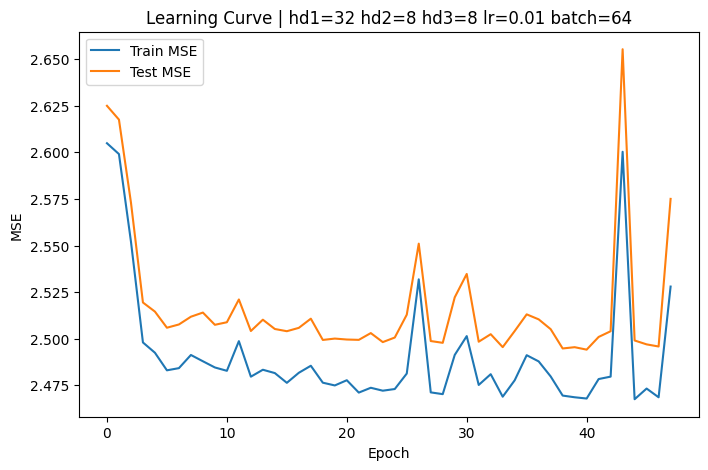


Deneme: hd1=32, hd2=8, hd3=16, lr=0.005, batch_size=32
Epoch 1/50 | Train MSE: 2.6058 | Test MSE: 2.6254
Epoch 2/50 | Train MSE: 2.5843 | Test MSE: 2.6027
Epoch 3/50 | Train MSE: 2.5085 | Test MSE: 2.5285
Epoch 4/50 | Train MSE: 2.4985 | Test MSE: 2.5182
Epoch 5/50 | Train MSE: 2.4873 | Test MSE: 2.5091
Epoch 6/50 | Train MSE: 2.4780 | Test MSE: 2.4999
Epoch 7/50 | Train MSE: 2.4741 | Test MSE: 2.5000
Epoch 8/50 | Train MSE: 2.4739 | Test MSE: 2.4944
Epoch 9/50 | Train MSE: 2.4760 | Test MSE: 2.4980
Epoch 10/50 | Train MSE: 2.4579 | Test MSE: 2.4798
Epoch 11/50 | Train MSE: 2.4598 | Test MSE: 2.4821
Epoch 12/50 | Train MSE: 2.5114 | Test MSE: 2.5304
Epoch 13/50 | Train MSE: 2.4930 | Test MSE: 2.5193
Epoch 14/50 | Train MSE: 2.4863 | Test MSE: 2.5098
Epoch 15/50 | Train MSE: 2.4999 | Test MSE: 2.5206
Epoch 16/50 | Train MSE: 2.4796 | Test MSE: 2.5050
Epoch 17/50 | Train MSE: 2.4837 | Test MSE: 2.5069
Early stopping at epoch 17
Kombinasyon En iyi Test MSE: 2.4798


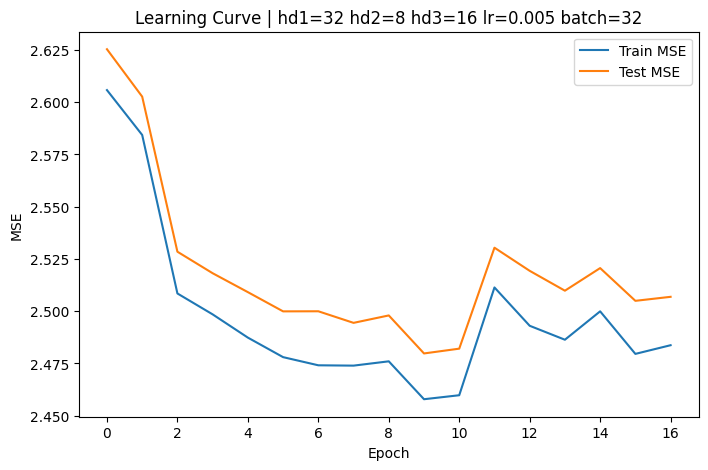


Deneme: hd1=32, hd2=8, hd3=16, lr=0.005, batch_size=64
Epoch 1/50 | Train MSE: 2.6178 | Test MSE: 2.6379
Epoch 2/50 | Train MSE: 2.6070 | Test MSE: 2.6274
Epoch 3/50 | Train MSE: 2.6047 | Test MSE: 2.6252
Epoch 4/50 | Train MSE: 2.5518 | Test MSE: 2.5687
Epoch 5/50 | Train MSE: 2.5098 | Test MSE: 2.5309
Epoch 6/50 | Train MSE: 2.5029 | Test MSE: 2.5274
Epoch 7/50 | Train MSE: 2.4967 | Test MSE: 2.5209
Epoch 8/50 | Train MSE: 2.4911 | Test MSE: 2.5143
Epoch 9/50 | Train MSE: 2.4782 | Test MSE: 2.5015
Epoch 10/50 | Train MSE: 2.4766 | Test MSE: 2.4990
Epoch 11/50 | Train MSE: 2.4779 | Test MSE: 2.5019
Epoch 12/50 | Train MSE: 2.4839 | Test MSE: 2.5042
Epoch 13/50 | Train MSE: 2.4709 | Test MSE: 2.4972
Epoch 14/50 | Train MSE: 2.4699 | Test MSE: 2.4931
Epoch 15/50 | Train MSE: 2.4726 | Test MSE: 2.4922
Epoch 16/50 | Train MSE: 2.4623 | Test MSE: 2.4861
Epoch 17/50 | Train MSE: 2.4671 | Test MSE: 2.4882
Epoch 18/50 | Train MSE: 2.4569 | Test MSE: 2.4799
Epoch 19/50 | Train MSE: 2.4618 | T

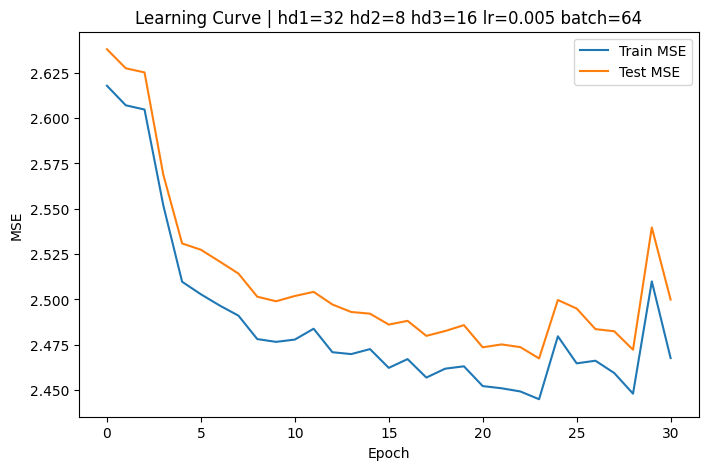


Deneme: hd1=32, hd2=8, hd3=16, lr=0.01, batch_size=32
Epoch 1/50 | Train MSE: 2.5888 | Test MSE: 2.6079
Epoch 2/50 | Train MSE: 2.5050 | Test MSE: 2.5230
Epoch 3/50 | Train MSE: 2.5071 | Test MSE: 2.5273
Epoch 4/50 | Train MSE: 2.4922 | Test MSE: 2.5124
Epoch 5/50 | Train MSE: 2.4777 | Test MSE: 2.4983
Epoch 6/50 | Train MSE: 2.4729 | Test MSE: 2.4950
Epoch 7/50 | Train MSE: 2.4565 | Test MSE: 2.4806
Epoch 8/50 | Train MSE: 2.4549 | Test MSE: 2.4779
Epoch 9/50 | Train MSE: 2.4557 | Test MSE: 2.4775
Epoch 10/50 | Train MSE: 2.4569 | Test MSE: 2.4803
Epoch 11/50 | Train MSE: 2.4540 | Test MSE: 2.4777
Epoch 12/50 | Train MSE: 2.5099 | Test MSE: 2.5391
Epoch 13/50 | Train MSE: 2.4665 | Test MSE: 2.4975
Epoch 14/50 | Train MSE: 2.4659 | Test MSE: 2.4918
Epoch 15/50 | Train MSE: 2.4814 | Test MSE: 2.5037
Epoch 16/50 | Train MSE: 2.4627 | Test MSE: 2.4888
Early stopping at epoch 16
Kombinasyon En iyi Test MSE: 2.4775


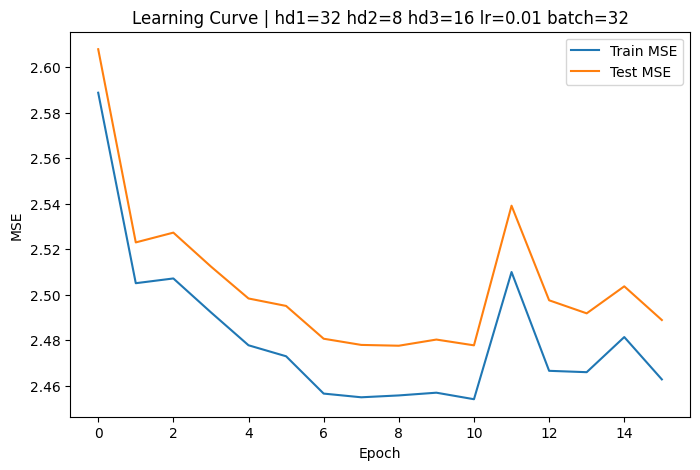


Deneme: hd1=32, hd2=8, hd3=16, lr=0.01, batch_size=64
Epoch 1/50 | Train MSE: 2.6052 | Test MSE: 2.6254
Epoch 2/50 | Train MSE: 2.5862 | Test MSE: 2.6046
Epoch 3/50 | Train MSE: 2.5065 | Test MSE: 2.5255
Epoch 4/50 | Train MSE: 2.5024 | Test MSE: 2.5227
Epoch 5/50 | Train MSE: 2.4905 | Test MSE: 2.5114
Epoch 6/50 | Train MSE: 2.4803 | Test MSE: 2.5035
Epoch 7/50 | Train MSE: 2.4786 | Test MSE: 2.5025
Epoch 8/50 | Train MSE: 2.4819 | Test MSE: 2.5011
Epoch 9/50 | Train MSE: 2.4703 | Test MSE: 2.4936
Epoch 10/50 | Train MSE: 2.4616 | Test MSE: 2.4854
Epoch 11/50 | Train MSE: 2.4648 | Test MSE: 2.4869
Epoch 12/50 | Train MSE: 2.4919 | Test MSE: 2.5110
Epoch 13/50 | Train MSE: 2.4577 | Test MSE: 2.4846
Epoch 14/50 | Train MSE: 2.4624 | Test MSE: 2.4875
Epoch 15/50 | Train MSE: 2.4631 | Test MSE: 2.4789
Epoch 16/50 | Train MSE: 2.4451 | Test MSE: 2.4677
Epoch 17/50 | Train MSE: 2.5550 | Test MSE: 2.5751
Epoch 18/50 | Train MSE: 2.4493 | Test MSE: 2.4719
Epoch 19/50 | Train MSE: 2.4433 | Te

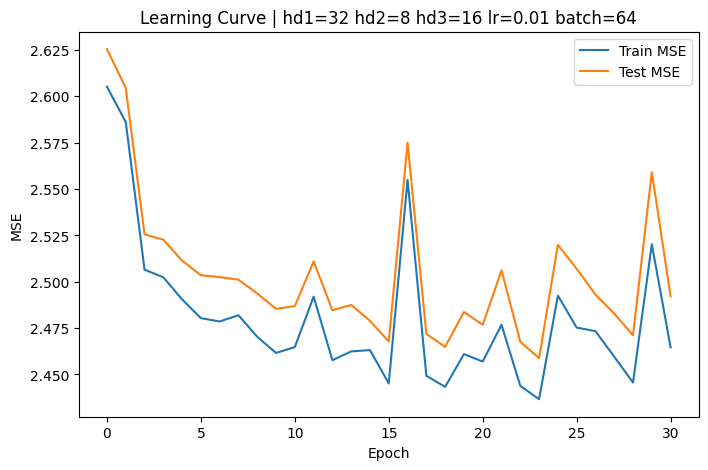


Deneme: hd1=32, hd2=16, hd3=8, lr=0.005, batch_size=32
Epoch 1/50 | Train MSE: 2.6295 | Test MSE: 2.6479
Epoch 2/50 | Train MSE: 2.5690 | Test MSE: 2.5875
Epoch 3/50 | Train MSE: 2.4963 | Test MSE: 2.5183
Epoch 4/50 | Train MSE: 2.5006 | Test MSE: 2.5273
Epoch 5/50 | Train MSE: 2.4831 | Test MSE: 2.5074
Epoch 6/50 | Train MSE: 2.4855 | Test MSE: 2.5113
Epoch 7/50 | Train MSE: 2.4954 | Test MSE: 2.5179
Epoch 8/50 | Train MSE: 2.4784 | Test MSE: 2.5076
Epoch 9/50 | Train MSE: 2.4905 | Test MSE: 2.5132
Epoch 10/50 | Train MSE: 2.4757 | Test MSE: 2.4993
Epoch 11/50 | Train MSE: 2.4758 | Test MSE: 2.5002
Epoch 12/50 | Train MSE: 2.4961 | Test MSE: 2.5208
Epoch 13/50 | Train MSE: 2.4951 | Test MSE: 2.5269
Epoch 14/50 | Train MSE: 2.4882 | Test MSE: 2.5116
Epoch 15/50 | Train MSE: 2.4766 | Test MSE: 2.4990
Epoch 16/50 | Train MSE: 2.4579 | Test MSE: 2.4809
Epoch 17/50 | Train MSE: 2.5230 | Test MSE: 2.5442
Epoch 18/50 | Train MSE: 2.4627 | Test MSE: 2.4864
Epoch 19/50 | Train MSE: 2.4484 | T

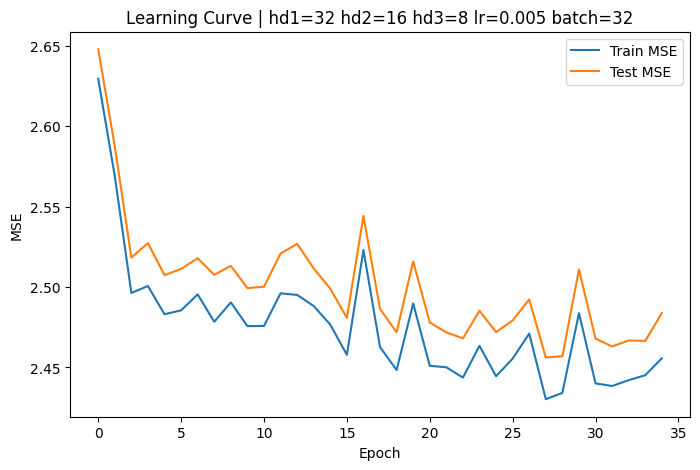


Deneme: hd1=32, hd2=16, hd3=8, lr=0.005, batch_size=64
Epoch 1/50 | Train MSE: 2.6223 | Test MSE: 2.6418
Epoch 2/50 | Train MSE: 2.6031 | Test MSE: 2.6226
Epoch 3/50 | Train MSE: 2.5967 | Test MSE: 2.6168
Epoch 4/50 | Train MSE: 2.5661 | Test MSE: 2.5880
Epoch 5/50 | Train MSE: 2.4848 | Test MSE: 2.5083
Epoch 6/50 | Train MSE: 2.4778 | Test MSE: 2.5030
Epoch 7/50 | Train MSE: 2.4984 | Test MSE: 2.5241
Epoch 8/50 | Train MSE: 2.4803 | Test MSE: 2.5071
Epoch 9/50 | Train MSE: 2.4910 | Test MSE: 2.5139
Epoch 10/50 | Train MSE: 2.4758 | Test MSE: 2.4988
Epoch 11/50 | Train MSE: 2.4778 | Test MSE: 2.5044
Epoch 12/50 | Train MSE: 2.4808 | Test MSE: 2.5041
Epoch 13/50 | Train MSE: 2.4795 | Test MSE: 2.5089
Epoch 14/50 | Train MSE: 2.4822 | Test MSE: 2.5088
Epoch 15/50 | Train MSE: 2.4786 | Test MSE: 2.5001
Epoch 16/50 | Train MSE: 2.4627 | Test MSE: 2.4850
Epoch 17/50 | Train MSE: 2.4863 | Test MSE: 2.5105
Epoch 18/50 | Train MSE: 2.4603 | Test MSE: 2.4858
Epoch 19/50 | Train MSE: 2.4599 | T

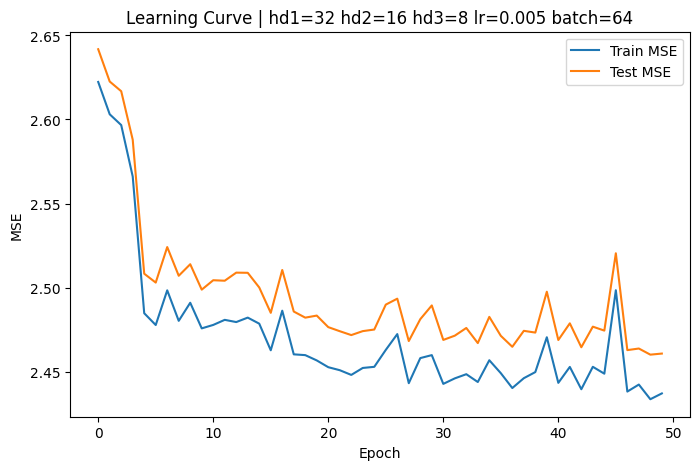


Deneme: hd1=32, hd2=16, hd3=8, lr=0.01, batch_size=32
Epoch 1/50 | Train MSE: 2.6237 | Test MSE: 2.6403
Epoch 2/50 | Train MSE: 2.4933 | Test MSE: 2.5125
Epoch 3/50 | Train MSE: 2.4971 | Test MSE: 2.5183
Epoch 4/50 | Train MSE: 2.5246 | Test MSE: 2.5542
Epoch 5/50 | Train MSE: 2.4873 | Test MSE: 2.5131
Epoch 6/50 | Train MSE: 2.4829 | Test MSE: 2.5093
Epoch 7/50 | Train MSE: 2.4961 | Test MSE: 2.5197
Epoch 8/50 | Train MSE: 2.4811 | Test MSE: 2.5107
Epoch 9/50 | Train MSE: 2.5061 | Test MSE: 2.5284
Epoch 10/50 | Train MSE: 2.4806 | Test MSE: 2.5049
Epoch 11/50 | Train MSE: 2.4946 | Test MSE: 2.5232
Epoch 12/50 | Train MSE: 2.4904 | Test MSE: 2.5100
Epoch 13/50 | Train MSE: 2.5153 | Test MSE: 2.5385
Epoch 14/50 | Train MSE: 2.5036 | Test MSE: 2.5273
Epoch 15/50 | Train MSE: 2.4809 | Test MSE: 2.5001
Epoch 16/50 | Train MSE: 2.4506 | Test MSE: 2.4739
Epoch 17/50 | Train MSE: 2.5311 | Test MSE: 2.5503
Epoch 18/50 | Train MSE: 2.4600 | Test MSE: 2.4821
Epoch 19/50 | Train MSE: 2.4509 | Te

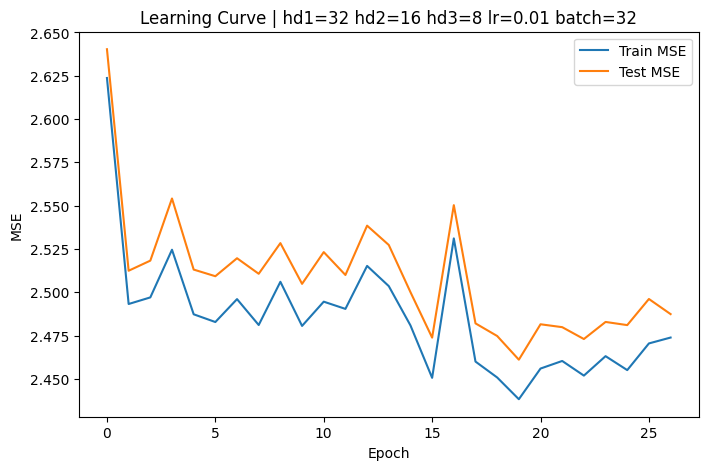


Deneme: hd1=32, hd2=16, hd3=8, lr=0.01, batch_size=64
Epoch 1/50 | Train MSE: 2.6292 | Test MSE: 2.6475
Epoch 2/50 | Train MSE: 2.5697 | Test MSE: 2.5881
Epoch 3/50 | Train MSE: 2.4933 | Test MSE: 2.5142
Epoch 4/50 | Train MSE: 2.4882 | Test MSE: 2.5149
Epoch 5/50 | Train MSE: 2.4911 | Test MSE: 2.5141
Epoch 6/50 | Train MSE: 2.4815 | Test MSE: 2.5072
Epoch 7/50 | Train MSE: 2.4954 | Test MSE: 2.5181
Epoch 8/50 | Train MSE: 2.4818 | Test MSE: 2.5098
Epoch 9/50 | Train MSE: 2.4955 | Test MSE: 2.5168
Epoch 10/50 | Train MSE: 2.4831 | Test MSE: 2.5074
Epoch 11/50 | Train MSE: 2.4821 | Test MSE: 2.5092
Epoch 12/50 | Train MSE: 2.4877 | Test MSE: 2.5107
Epoch 13/50 | Train MSE: 2.5079 | Test MSE: 2.5437
Early stopping at epoch 13
Kombinasyon En iyi Test MSE: 2.5072


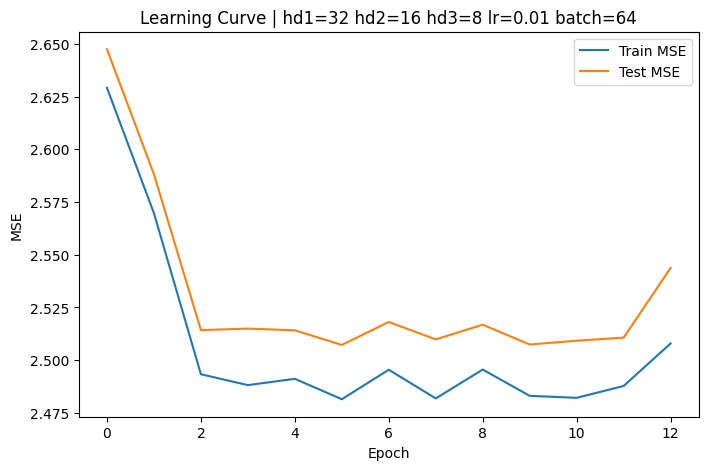


Deneme: hd1=32, hd2=16, hd3=16, lr=0.005, batch_size=32
Epoch 1/50 | Train MSE: 2.6025 | Test MSE: 2.6228
Epoch 2/50 | Train MSE: 2.5362 | Test MSE: 2.5652
Epoch 3/50 | Train MSE: 2.4996 | Test MSE: 2.5253
Epoch 4/50 | Train MSE: 2.4818 | Test MSE: 2.5051
Epoch 5/50 | Train MSE: 2.4791 | Test MSE: 2.5026
Epoch 6/50 | Train MSE: 2.5552 | Test MSE: 2.5817
Epoch 7/50 | Train MSE: 2.4760 | Test MSE: 2.4976
Epoch 8/50 | Train MSE: 2.4639 | Test MSE: 2.4859
Epoch 9/50 | Train MSE: 2.4669 | Test MSE: 2.4865
Epoch 10/50 | Train MSE: 2.4576 | Test MSE: 2.4799
Epoch 11/50 | Train MSE: 2.4923 | Test MSE: 2.5161
Epoch 12/50 | Train MSE: 2.4640 | Test MSE: 2.4868
Epoch 13/50 | Train MSE: 2.4506 | Test MSE: 2.4737
Epoch 14/50 | Train MSE: 2.5251 | Test MSE: 2.5555
Epoch 15/50 | Train MSE: 2.4491 | Test MSE: 2.4729
Epoch 16/50 | Train MSE: 2.4500 | Test MSE: 2.4749
Epoch 17/50 | Train MSE: 2.4528 | Test MSE: 2.4779
Epoch 18/50 | Train MSE: 2.4625 | Test MSE: 2.4854
Epoch 19/50 | Train MSE: 2.4452 | 

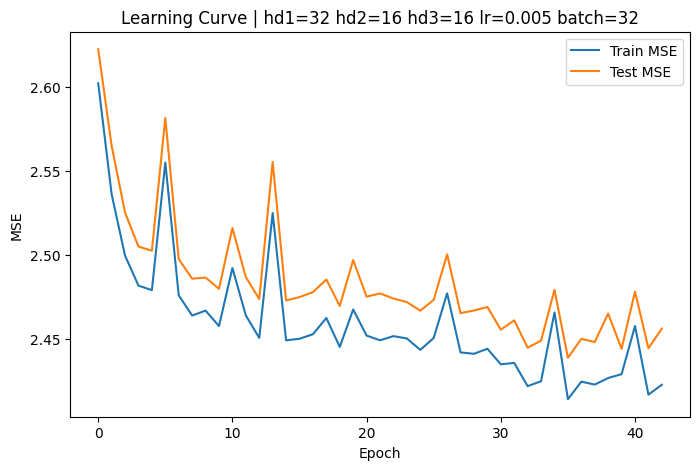


Deneme: hd1=32, hd2=16, hd3=16, lr=0.005, batch_size=64
Epoch 1/50 | Train MSE: 2.6085 | Test MSE: 2.6292
Epoch 2/50 | Train MSE: 2.6112 | Test MSE: 2.6304
Epoch 3/50 | Train MSE: 2.5555 | Test MSE: 2.5753
Epoch 4/50 | Train MSE: 2.5025 | Test MSE: 2.5279
Epoch 5/50 | Train MSE: 2.5032 | Test MSE: 2.5292
Epoch 6/50 | Train MSE: 2.5389 | Test MSE: 2.5641
Epoch 7/50 | Train MSE: 2.4818 | Test MSE: 2.5048
Epoch 8/50 | Train MSE: 2.4757 | Test MSE: 2.4981
Epoch 9/50 | Train MSE: 2.4818 | Test MSE: 2.5048
Epoch 10/50 | Train MSE: 2.4694 | Test MSE: 2.4931
Epoch 11/50 | Train MSE: 2.5197 | Test MSE: 2.5402
Epoch 12/50 | Train MSE: 2.4668 | Test MSE: 2.4890
Epoch 13/50 | Train MSE: 2.4706 | Test MSE: 2.4965
Epoch 14/50 | Train MSE: 2.5076 | Test MSE: 2.5380
Epoch 15/50 | Train MSE: 2.4626 | Test MSE: 2.4842
Epoch 16/50 | Train MSE: 2.4610 | Test MSE: 2.4859
Epoch 17/50 | Train MSE: 2.4554 | Test MSE: 2.4793
Epoch 18/50 | Train MSE: 2.4682 | Test MSE: 2.4924
Epoch 19/50 | Train MSE: 2.4513 | 

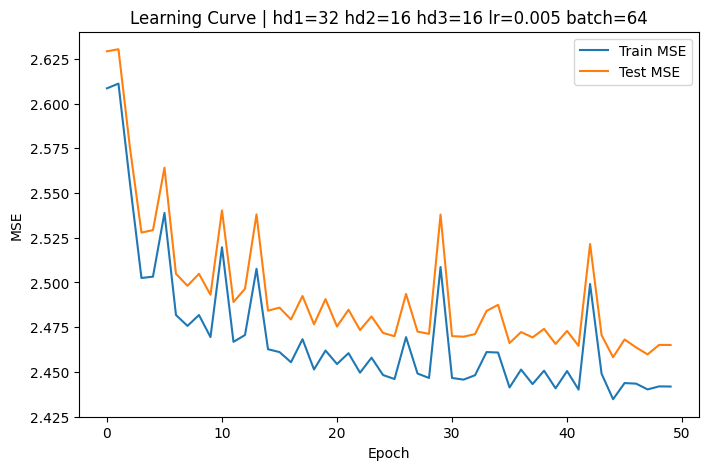


Deneme: hd1=32, hd2=16, hd3=16, lr=0.01, batch_size=32
Epoch 1/50 | Train MSE: 2.5535 | Test MSE: 2.5726
Epoch 2/50 | Train MSE: 2.5074 | Test MSE: 2.5303
Epoch 3/50 | Train MSE: 2.5039 | Test MSE: 2.5297
Epoch 4/50 | Train MSE: 2.4815 | Test MSE: 2.5027
Epoch 5/50 | Train MSE: 2.4864 | Test MSE: 2.5132
Epoch 6/50 | Train MSE: 2.4952 | Test MSE: 2.5203
Epoch 7/50 | Train MSE: 2.4686 | Test MSE: 2.4938
Epoch 8/50 | Train MSE: 2.4574 | Test MSE: 2.4796
Epoch 9/50 | Train MSE: 2.4743 | Test MSE: 2.4917
Epoch 10/50 | Train MSE: 2.4603 | Test MSE: 2.4832
Epoch 11/50 | Train MSE: 2.4682 | Test MSE: 2.4888
Epoch 12/50 | Train MSE: 2.4526 | Test MSE: 2.4742
Epoch 13/50 | Train MSE: 2.4441 | Test MSE: 2.4694
Epoch 14/50 | Train MSE: 2.5290 | Test MSE: 2.5452
Epoch 15/50 | Train MSE: 2.4603 | Test MSE: 2.4790
Epoch 16/50 | Train MSE: 2.4594 | Test MSE: 2.4960
Epoch 17/50 | Train MSE: 2.4575 | Test MSE: 2.4796
Epoch 18/50 | Train MSE: 2.4659 | Test MSE: 2.4890
Epoch 19/50 | Train MSE: 2.4282 | T

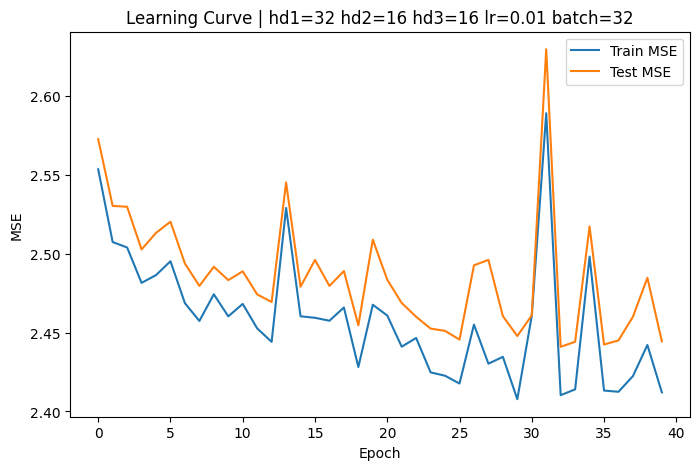


Deneme: hd1=32, hd2=16, hd3=16, lr=0.01, batch_size=64
Epoch 1/50 | Train MSE: 2.6029 | Test MSE: 2.6232
Epoch 2/50 | Train MSE: 2.5368 | Test MSE: 2.5639
Epoch 3/50 | Train MSE: 2.4994 | Test MSE: 2.5258
Epoch 4/50 | Train MSE: 2.4789 | Test MSE: 2.5015
Epoch 5/50 | Train MSE: 2.4861 | Test MSE: 2.5108
Epoch 6/50 | Train MSE: 2.5270 | Test MSE: 2.5491
Epoch 7/50 | Train MSE: 2.4793 | Test MSE: 2.5024
Epoch 8/50 | Train MSE: 2.4677 | Test MSE: 2.4900
Epoch 9/50 | Train MSE: 2.4668 | Test MSE: 2.4868
Epoch 10/50 | Train MSE: 2.4563 | Test MSE: 2.4808
Epoch 11/50 | Train MSE: 2.5024 | Test MSE: 2.5258
Epoch 12/50 | Train MSE: 2.4629 | Test MSE: 2.4855
Epoch 13/50 | Train MSE: 2.4535 | Test MSE: 2.4777
Epoch 14/50 | Train MSE: 2.5074 | Test MSE: 2.5381
Epoch 15/50 | Train MSE: 2.4533 | Test MSE: 2.4765
Epoch 16/50 | Train MSE: 2.4480 | Test MSE: 2.4731
Epoch 17/50 | Train MSE: 2.4545 | Test MSE: 2.4794
Epoch 18/50 | Train MSE: 2.4708 | Test MSE: 2.4943
Epoch 19/50 | Train MSE: 2.4438 | T

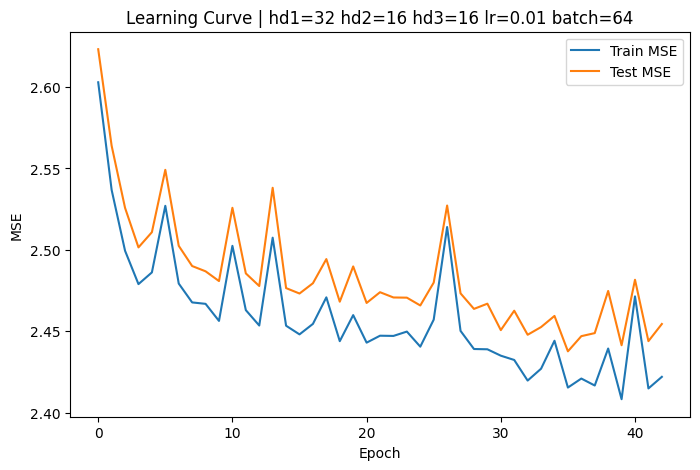


Deneme: hd1=64, hd2=8, hd3=8, lr=0.005, batch_size=32
Epoch 1/50 | Train MSE: 2.6478 | Test MSE: 2.6675
Epoch 2/50 | Train MSE: 2.5244 | Test MSE: 2.5432
Epoch 3/50 | Train MSE: 2.5228 | Test MSE: 2.5478
Epoch 4/50 | Train MSE: 2.5198 | Test MSE: 2.5456
Epoch 5/50 | Train MSE: 2.4898 | Test MSE: 2.5119
Epoch 6/50 | Train MSE: 2.4927 | Test MSE: 2.5145
Epoch 7/50 | Train MSE: 2.4972 | Test MSE: 2.5216
Epoch 8/50 | Train MSE: 2.4861 | Test MSE: 2.5120
Epoch 9/50 | Train MSE: 2.4975 | Test MSE: 2.5205
Epoch 10/50 | Train MSE: 2.4815 | Test MSE: 2.5052
Epoch 11/50 | Train MSE: 2.4796 | Test MSE: 2.5046
Epoch 12/50 | Train MSE: 2.4837 | Test MSE: 2.5073
Epoch 13/50 | Train MSE: 2.5037 | Test MSE: 2.5356
Epoch 14/50 | Train MSE: 2.4842 | Test MSE: 2.5144
Epoch 15/50 | Train MSE: 2.4870 | Test MSE: 2.5083
Epoch 16/50 | Train MSE: 2.4761 | Test MSE: 2.5014
Epoch 17/50 | Train MSE: 2.4879 | Test MSE: 2.5095
Epoch 18/50 | Train MSE: 2.4769 | Test MSE: 2.5015
Epoch 19/50 | Train MSE: 2.4811 | Te

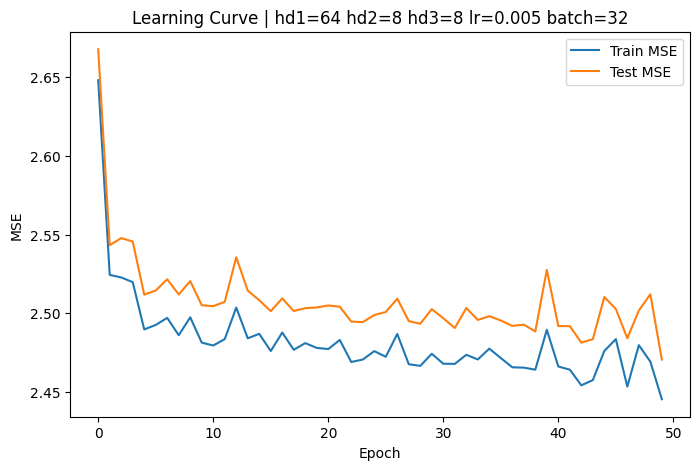


Deneme: hd1=64, hd2=8, hd3=8, lr=0.005, batch_size=64
Epoch 1/50 | Train MSE: 2.6269 | Test MSE: 2.6469
Epoch 2/50 | Train MSE: 2.6091 | Test MSE: 2.6298
Epoch 3/50 | Train MSE: 2.5861 | Test MSE: 2.6074
Epoch 4/50 | Train MSE: 2.5486 | Test MSE: 2.5783
Epoch 5/50 | Train MSE: 2.5071 | Test MSE: 2.5328
Epoch 6/50 | Train MSE: 2.5093 | Test MSE: 2.5344
Epoch 7/50 | Train MSE: 2.5222 | Test MSE: 2.5459
Epoch 8/50 | Train MSE: 2.4961 | Test MSE: 2.5198
Epoch 9/50 | Train MSE: 2.4890 | Test MSE: 2.5123
Epoch 10/50 | Train MSE: 2.4836 | Test MSE: 2.5076
Epoch 11/50 | Train MSE: 2.4829 | Test MSE: 2.5086
Epoch 12/50 | Train MSE: 2.4831 | Test MSE: 2.5067
Epoch 13/50 | Train MSE: 2.4832 | Test MSE: 2.5097
Epoch 14/50 | Train MSE: 2.4867 | Test MSE: 2.5116
Epoch 15/50 | Train MSE: 2.4874 | Test MSE: 2.5100
Epoch 16/50 | Train MSE: 2.4777 | Test MSE: 2.5023
Epoch 17/50 | Train MSE: 2.4827 | Test MSE: 2.5060
Epoch 18/50 | Train MSE: 2.4787 | Test MSE: 2.5056
Epoch 19/50 | Train MSE: 2.4799 | Te

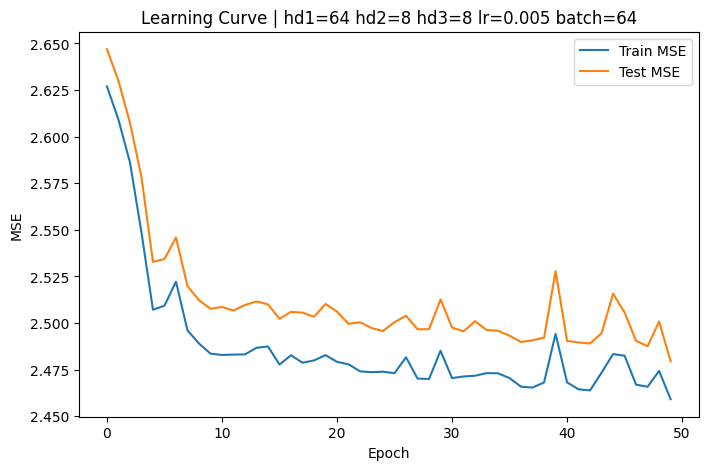


Deneme: hd1=64, hd2=8, hd3=8, lr=0.01, batch_size=32
Epoch 1/50 | Train MSE: 2.6919 | Test MSE: 2.7116
Epoch 2/50 | Train MSE: 2.5084 | Test MSE: 2.5310
Epoch 3/50 | Train MSE: 2.5018 | Test MSE: 2.5211
Epoch 4/50 | Train MSE: 2.5079 | Test MSE: 2.5330
Epoch 5/50 | Train MSE: 2.4872 | Test MSE: 2.5108
Epoch 6/50 | Train MSE: 2.4869 | Test MSE: 2.5113
Epoch 7/50 | Train MSE: 2.5035 | Test MSE: 2.5240
Epoch 8/50 | Train MSE: 2.4895 | Test MSE: 2.5182
Epoch 9/50 | Train MSE: 2.5105 | Test MSE: 2.5335
Epoch 10/50 | Train MSE: 2.4843 | Test MSE: 2.5093
Epoch 11/50 | Train MSE: 2.4862 | Test MSE: 2.5091
Epoch 12/50 | Train MSE: 2.4957 | Test MSE: 2.5180
Epoch 13/50 | Train MSE: 2.5461 | Test MSE: 2.5892
Epoch 14/50 | Train MSE: 2.4883 | Test MSE: 2.5159
Epoch 15/50 | Train MSE: 2.4884 | Test MSE: 2.5108
Epoch 16/50 | Train MSE: 2.4931 | Test MSE: 2.5184
Epoch 17/50 | Train MSE: 2.5074 | Test MSE: 2.5278
Epoch 18/50 | Train MSE: 2.4904 | Test MSE: 2.5149
Early stopping at epoch 18
Kombinasyo

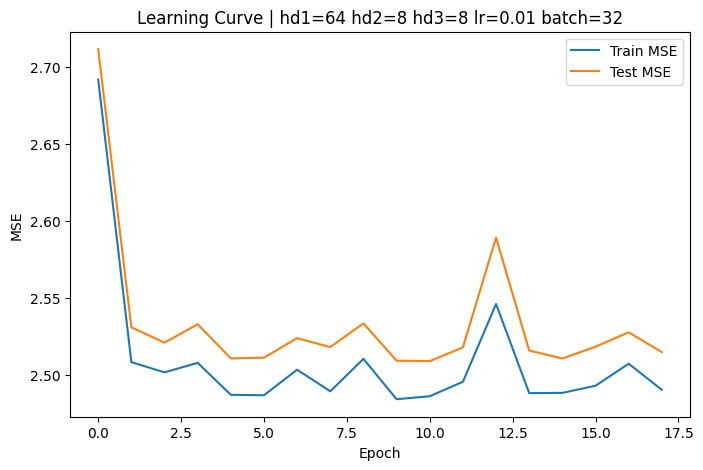


Deneme: hd1=64, hd2=8, hd3=8, lr=0.01, batch_size=64
Epoch 1/50 | Train MSE: 2.6470 | Test MSE: 2.6667
Epoch 2/50 | Train MSE: 2.5295 | Test MSE: 2.5472
Epoch 3/50 | Train MSE: 2.5257 | Test MSE: 2.5508
Epoch 4/50 | Train MSE: 2.5287 | Test MSE: 2.5543
Epoch 5/50 | Train MSE: 2.4868 | Test MSE: 2.5089
Epoch 6/50 | Train MSE: 2.4929 | Test MSE: 2.5136
Epoch 7/50 | Train MSE: 2.4973 | Test MSE: 2.5205
Epoch 8/50 | Train MSE: 2.4873 | Test MSE: 2.5126
Epoch 9/50 | Train MSE: 2.4941 | Test MSE: 2.5173
Epoch 10/50 | Train MSE: 2.4802 | Test MSE: 2.5032
Epoch 11/50 | Train MSE: 2.4874 | Test MSE: 2.5102
Epoch 12/50 | Train MSE: 2.4843 | Test MSE: 2.5075
Epoch 13/50 | Train MSE: 2.5007 | Test MSE: 2.5324
Epoch 14/50 | Train MSE: 2.4894 | Test MSE: 2.5201
Epoch 15/50 | Train MSE: 2.4864 | Test MSE: 2.5079
Epoch 16/50 | Train MSE: 2.4745 | Test MSE: 2.4988
Epoch 17/50 | Train MSE: 2.4881 | Test MSE: 2.5092
Epoch 18/50 | Train MSE: 2.4781 | Test MSE: 2.5029
Epoch 19/50 | Train MSE: 2.4809 | Tes

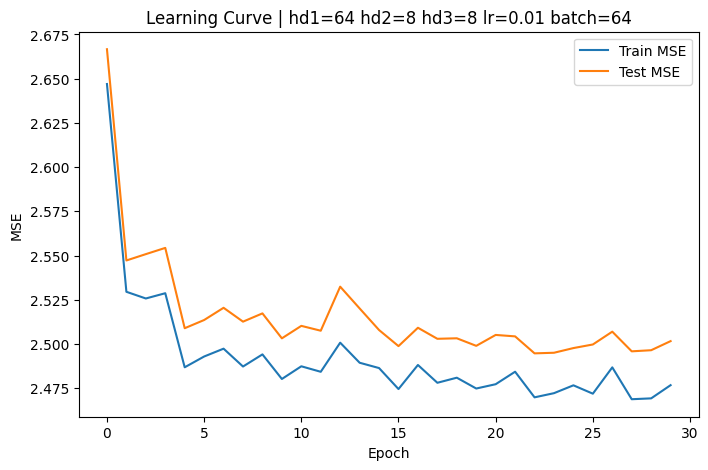


Deneme: hd1=64, hd2=8, hd3=16, lr=0.005, batch_size=32
Epoch 1/50 | Train MSE: 2.6023 | Test MSE: 2.6226
Epoch 2/50 | Train MSE: 2.5252 | Test MSE: 2.5481
Epoch 3/50 | Train MSE: 2.5015 | Test MSE: 2.5262
Epoch 4/50 | Train MSE: 2.4972 | Test MSE: 2.5197
Epoch 5/50 | Train MSE: 2.4899 | Test MSE: 2.5119
Epoch 6/50 | Train MSE: 2.5001 | Test MSE: 2.5237
Epoch 7/50 | Train MSE: 2.4880 | Test MSE: 2.5096
Epoch 8/50 | Train MSE: 2.4956 | Test MSE: 2.5272
Epoch 9/50 | Train MSE: 2.4720 | Test MSE: 2.4936
Epoch 10/50 | Train MSE: 2.4645 | Test MSE: 2.4858
Epoch 11/50 | Train MSE: 2.4785 | Test MSE: 2.4992
Epoch 12/50 | Train MSE: 2.4650 | Test MSE: 2.4884
Epoch 13/50 | Train MSE: 2.4660 | Test MSE: 2.4868
Epoch 14/50 | Train MSE: 2.5079 | Test MSE: 2.5356
Epoch 15/50 | Train MSE: 2.4720 | Test MSE: 2.4943
Epoch 16/50 | Train MSE: 2.4526 | Test MSE: 2.4762
Epoch 17/50 | Train MSE: 2.4480 | Test MSE: 2.4711
Epoch 18/50 | Train MSE: 2.4648 | Test MSE: 2.4905
Epoch 19/50 | Train MSE: 2.4531 | T

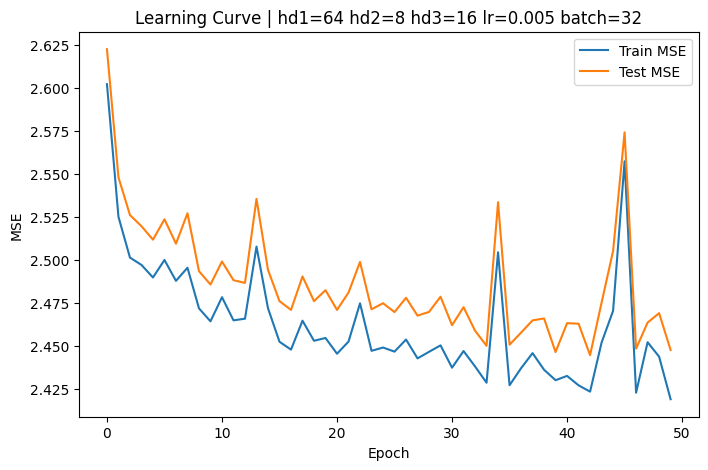


Deneme: hd1=64, hd2=8, hd3=16, lr=0.005, batch_size=64
Epoch 1/50 | Train MSE: 2.6098 | Test MSE: 2.6305
Epoch 2/50 | Train MSE: 2.6090 | Test MSE: 2.6285
Epoch 3/50 | Train MSE: 2.5499 | Test MSE: 2.5705
Epoch 4/50 | Train MSE: 2.5063 | Test MSE: 2.5308
Epoch 5/50 | Train MSE: 2.5060 | Test MSE: 2.5310
Epoch 6/50 | Train MSE: 2.5221 | Test MSE: 2.5473
Epoch 7/50 | Train MSE: 2.5041 | Test MSE: 2.5264
Epoch 8/50 | Train MSE: 2.4997 | Test MSE: 2.5249
Epoch 9/50 | Train MSE: 2.4824 | Test MSE: 2.5070
Epoch 10/50 | Train MSE: 2.4798 | Test MSE: 2.5034
Epoch 11/50 | Train MSE: 2.4852 | Test MSE: 2.5080
Epoch 12/50 | Train MSE: 2.4776 | Test MSE: 2.5017
Epoch 13/50 | Train MSE: 2.4793 | Test MSE: 2.5010
Epoch 14/50 | Train MSE: 2.4860 | Test MSE: 2.5131
Epoch 15/50 | Train MSE: 2.4803 | Test MSE: 2.5017
Epoch 16/50 | Train MSE: 2.4693 | Test MSE: 2.4920
Epoch 17/50 | Train MSE: 2.4661 | Test MSE: 2.4888
Epoch 18/50 | Train MSE: 2.4610 | Test MSE: 2.4860
Epoch 19/50 | Train MSE: 2.4699 | T

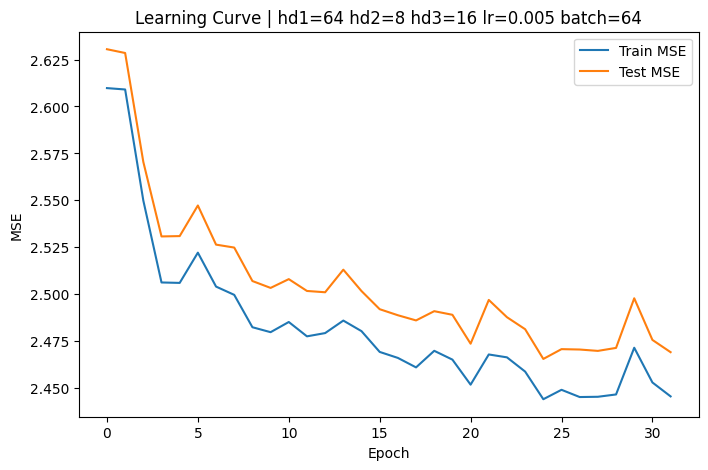


Deneme: hd1=64, hd2=8, hd3=16, lr=0.01, batch_size=32
Epoch 1/50 | Train MSE: 2.5484 | Test MSE: 2.5682
Epoch 2/50 | Train MSE: 2.4953 | Test MSE: 2.5184
Epoch 3/50 | Train MSE: 2.4915 | Test MSE: 2.5132
Epoch 4/50 | Train MSE: 2.4912 | Test MSE: 2.5116
Epoch 5/50 | Train MSE: 2.4941 | Test MSE: 2.5176
Epoch 6/50 | Train MSE: 2.4855 | Test MSE: 2.5128
Epoch 7/50 | Train MSE: 2.4881 | Test MSE: 2.5089
Epoch 8/50 | Train MSE: 2.4768 | Test MSE: 2.5079
Epoch 9/50 | Train MSE: 2.4648 | Test MSE: 2.4872
Epoch 10/50 | Train MSE: 2.4585 | Test MSE: 2.4855
Epoch 11/50 | Train MSE: 2.4717 | Test MSE: 2.4930
Epoch 12/50 | Train MSE: 2.4566 | Test MSE: 2.4794
Epoch 13/50 | Train MSE: 2.4798 | Test MSE: 2.5033
Epoch 14/50 | Train MSE: 2.5182 | Test MSE: 2.5428
Epoch 15/50 | Train MSE: 2.4780 | Test MSE: 2.4945
Epoch 16/50 | Train MSE: 2.4583 | Test MSE: 2.4829
Epoch 17/50 | Train MSE: 2.4633 | Test MSE: 2.4881
Epoch 18/50 | Train MSE: 2.4544 | Test MSE: 2.4767
Epoch 19/50 | Train MSE: 2.5213 | Te

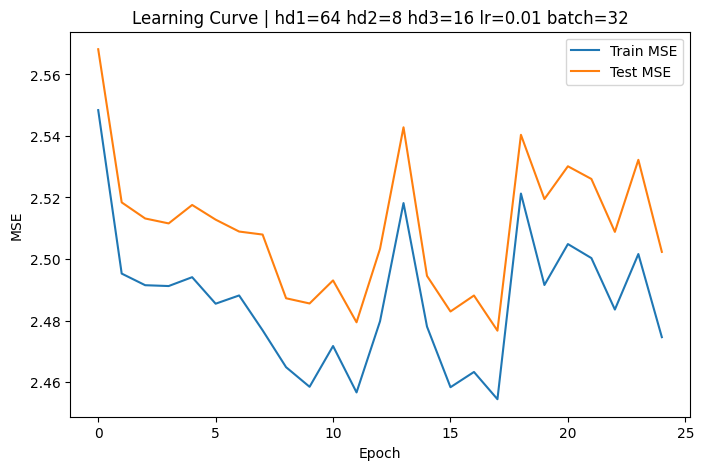


Deneme: hd1=64, hd2=8, hd3=16, lr=0.01, batch_size=64
Epoch 1/50 | Train MSE: 2.6019 | Test MSE: 2.6220
Epoch 2/50 | Train MSE: 2.5268 | Test MSE: 2.5494
Epoch 3/50 | Train MSE: 2.5019 | Test MSE: 2.5261
Epoch 4/50 | Train MSE: 2.4963 | Test MSE: 2.5176
Epoch 5/50 | Train MSE: 2.4881 | Test MSE: 2.5098
Epoch 6/50 | Train MSE: 2.4949 | Test MSE: 2.5197
Epoch 7/50 | Train MSE: 2.4897 | Test MSE: 2.5121
Epoch 8/50 | Train MSE: 2.4807 | Test MSE: 2.5071
Epoch 9/50 | Train MSE: 2.4684 | Test MSE: 2.4902
Epoch 10/50 | Train MSE: 2.4612 | Test MSE: 2.4844
Epoch 11/50 | Train MSE: 2.4789 | Test MSE: 2.5006
Epoch 12/50 | Train MSE: 2.4660 | Test MSE: 2.4898
Epoch 13/50 | Train MSE: 2.4664 | Test MSE: 2.4877
Epoch 14/50 | Train MSE: 2.5017 | Test MSE: 2.5301
Epoch 15/50 | Train MSE: 2.4571 | Test MSE: 2.4792
Epoch 16/50 | Train MSE: 2.4536 | Test MSE: 2.4775
Epoch 17/50 | Train MSE: 2.4478 | Test MSE: 2.4704
Epoch 18/50 | Train MSE: 2.4502 | Test MSE: 2.4757
Epoch 19/50 | Train MSE: 2.4527 | Te

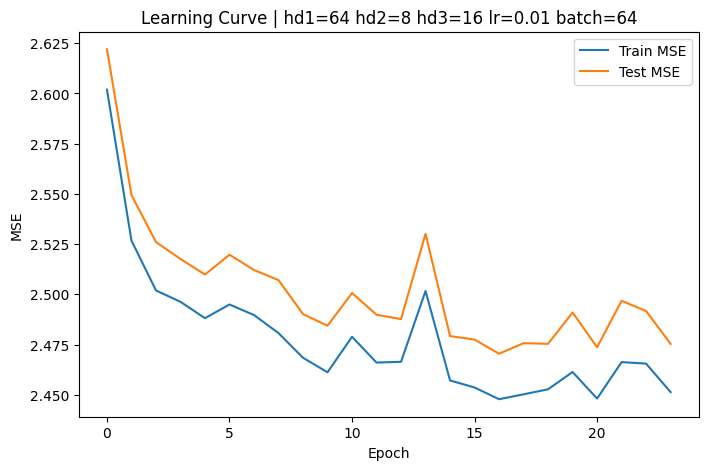


Deneme: hd1=64, hd2=16, hd3=8, lr=0.005, batch_size=32
Epoch 1/50 | Train MSE: 2.6125 | Test MSE: 2.6319
Epoch 2/50 | Train MSE: 2.5157 | Test MSE: 2.5422
Epoch 3/50 | Train MSE: 2.5135 | Test MSE: 2.5375
Epoch 4/50 | Train MSE: 2.7058 | Test MSE: 2.7336
Epoch 5/50 | Train MSE: 2.5038 | Test MSE: 2.5289
Epoch 6/50 | Train MSE: 2.4877 | Test MSE: 2.5087
Epoch 7/50 | Train MSE: 2.4879 | Test MSE: 2.5135
Epoch 8/50 | Train MSE: 2.4819 | Test MSE: 2.5053
Epoch 9/50 | Train MSE: 2.4967 | Test MSE: 2.5203
Epoch 10/50 | Train MSE: 2.5109 | Test MSE: 2.5433
Epoch 11/50 | Train MSE: 2.4822 | Test MSE: 2.5042
Epoch 12/50 | Train MSE: 2.4776 | Test MSE: 2.5032
Epoch 13/50 | Train MSE: 2.4776 | Test MSE: 2.5021
Epoch 14/50 | Train MSE: 2.4818 | Test MSE: 2.5080
Epoch 15/50 | Train MSE: 2.4856 | Test MSE: 2.5149
Epoch 16/50 | Train MSE: 2.4777 | Test MSE: 2.5033
Epoch 17/50 | Train MSE: 2.5079 | Test MSE: 2.5423
Epoch 18/50 | Train MSE: 2.4838 | Test MSE: 2.5075
Epoch 19/50 | Train MSE: 2.4775 | T

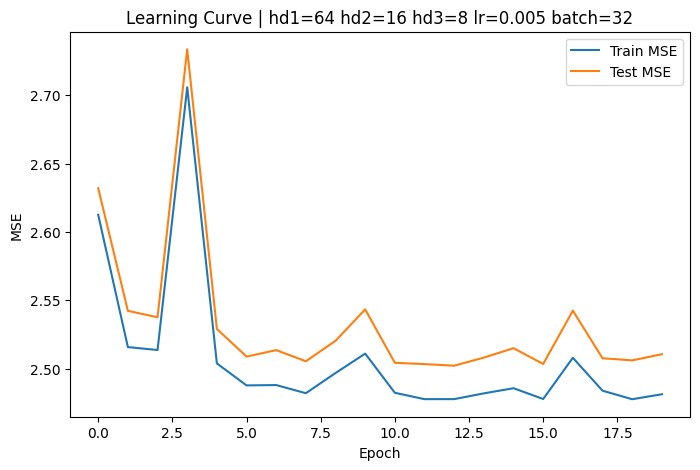


Deneme: hd1=64, hd2=16, hd3=8, lr=0.005, batch_size=64
Epoch 1/50 | Train MSE: 2.6117 | Test MSE: 2.6318
Epoch 2/50 | Train MSE: 2.6013 | Test MSE: 2.6216
Epoch 3/50 | Train MSE: 2.5385 | Test MSE: 2.5571
Epoch 4/50 | Train MSE: 2.7320 | Test MSE: 2.7620
Epoch 5/50 | Train MSE: 2.5224 | Test MSE: 2.5509
Epoch 6/50 | Train MSE: 2.5006 | Test MSE: 2.5247
Epoch 7/50 | Train MSE: 2.4989 | Test MSE: 2.5245
Epoch 8/50 | Train MSE: 2.4890 | Test MSE: 2.5113
Epoch 9/50 | Train MSE: 2.5063 | Test MSE: 2.5268
Epoch 10/50 | Train MSE: 2.4896 | Test MSE: 2.5173
Epoch 11/50 | Train MSE: 2.4827 | Test MSE: 2.5044
Epoch 12/50 | Train MSE: 2.4799 | Test MSE: 2.5023
Epoch 13/50 | Train MSE: 2.4784 | Test MSE: 2.5011
Epoch 14/50 | Train MSE: 2.4811 | Test MSE: 2.5057
Epoch 15/50 | Train MSE: 2.4832 | Test MSE: 2.5105
Epoch 16/50 | Train MSE: 2.4757 | Test MSE: 2.4998
Epoch 17/50 | Train MSE: 2.4926 | Test MSE: 2.5231
Epoch 18/50 | Train MSE: 2.4842 | Test MSE: 2.5066
Epoch 19/50 | Train MSE: 2.4787 | T

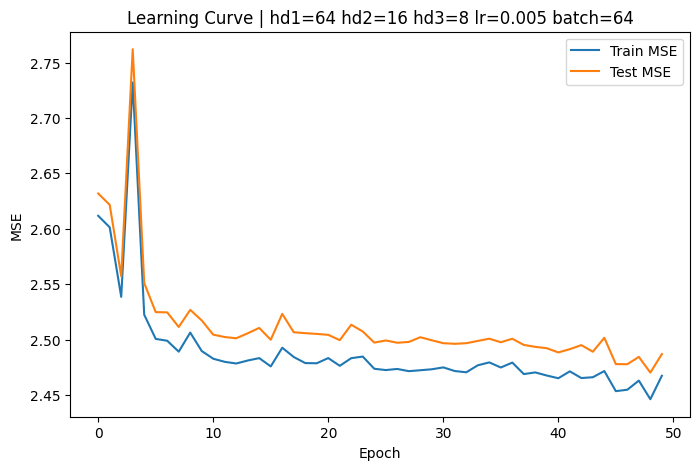


Deneme: hd1=64, hd2=16, hd3=8, lr=0.01, batch_size=32
Epoch 1/50 | Train MSE: 2.5505 | Test MSE: 2.5709
Epoch 2/50 | Train MSE: 2.5058 | Test MSE: 2.5296
Epoch 3/50 | Train MSE: 2.5055 | Test MSE: 2.5219
Epoch 4/50 | Train MSE: 2.7840 | Test MSE: 2.8191
Epoch 5/50 | Train MSE: 2.4849 | Test MSE: 2.5142
Epoch 6/50 | Train MSE: 2.4797 | Test MSE: 2.5031
Epoch 7/50 | Train MSE: 2.4854 | Test MSE: 2.5124
Epoch 8/50 | Train MSE: 2.4673 | Test MSE: 2.4938
Epoch 9/50 | Train MSE: 2.4883 | Test MSE: 2.5093
Epoch 10/50 | Train MSE: 2.4723 | Test MSE: 2.5024
Epoch 11/50 | Train MSE: 2.4628 | Test MSE: 2.4817
Epoch 12/50 | Train MSE: 2.4516 | Test MSE: 2.4735
Epoch 13/50 | Train MSE: 2.4490 | Test MSE: 2.4715
Epoch 14/50 | Train MSE: 2.4565 | Test MSE: 2.4812
Epoch 15/50 | Train MSE: 2.4904 | Test MSE: 2.5165
Epoch 16/50 | Train MSE: 2.4448 | Test MSE: 2.4698
Epoch 17/50 | Train MSE: 2.5488 | Test MSE: 2.5704
Epoch 18/50 | Train MSE: 2.4527 | Test MSE: 2.4773
Epoch 19/50 | Train MSE: 2.4481 | Te

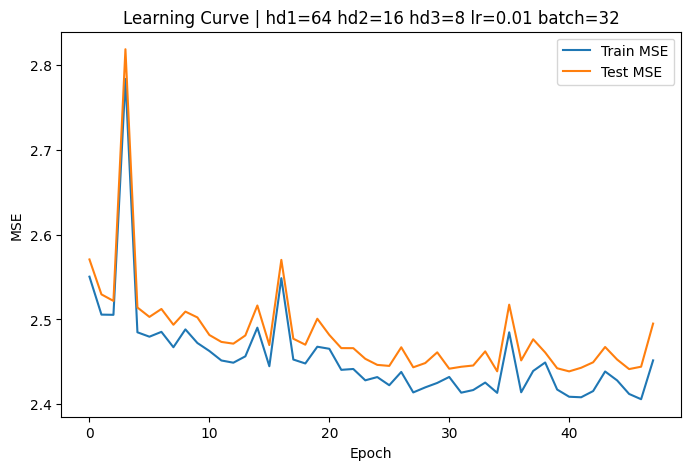


Deneme: hd1=64, hd2=16, hd3=8, lr=0.01, batch_size=64
Epoch 1/50 | Train MSE: 2.6131 | Test MSE: 2.6325
Epoch 2/50 | Train MSE: 2.5160 | Test MSE: 2.5416
Epoch 3/50 | Train MSE: 2.5144 | Test MSE: 2.5392
Epoch 4/50 | Train MSE: 2.7479 | Test MSE: 2.7765
Epoch 5/50 | Train MSE: 2.5052 | Test MSE: 2.5319
Epoch 6/50 | Train MSE: 2.4900 | Test MSE: 2.5111
Epoch 7/50 | Train MSE: 2.4859 | Test MSE: 2.5108
Epoch 8/50 | Train MSE: 2.4781 | Test MSE: 2.5015
Epoch 9/50 | Train MSE: 2.4923 | Test MSE: 2.5136
Epoch 10/50 | Train MSE: 2.5283 | Test MSE: 2.5629
Epoch 11/50 | Train MSE: 2.4784 | Test MSE: 2.4991
Epoch 12/50 | Train MSE: 2.4746 | Test MSE: 2.5010
Epoch 13/50 | Train MSE: 2.4701 | Test MSE: 2.4923
Epoch 14/50 | Train MSE: 2.4864 | Test MSE: 2.5148
Epoch 15/50 | Train MSE: 2.4724 | Test MSE: 2.4989
Epoch 16/50 | Train MSE: 2.4581 | Test MSE: 2.4814
Epoch 17/50 | Train MSE: 2.4980 | Test MSE: 2.5341
Epoch 18/50 | Train MSE: 2.4697 | Test MSE: 2.4900
Epoch 19/50 | Train MSE: 2.4619 | Te

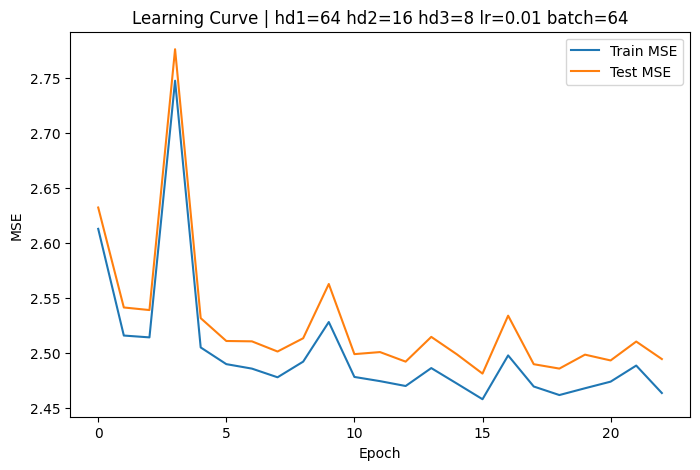


Deneme: hd1=64, hd2=16, hd3=16, lr=0.005, batch_size=32
Epoch 1/50 | Train MSE: 2.6061 | Test MSE: 2.6262
Epoch 2/50 | Train MSE: 2.5211 | Test MSE: 2.5402
Epoch 3/50 | Train MSE: 2.5048 | Test MSE: 2.5294
Epoch 4/50 | Train MSE: 2.4992 | Test MSE: 2.5217
Epoch 5/50 | Train MSE: 2.4926 | Test MSE: 2.5149
Epoch 6/50 | Train MSE: 2.4891 | Test MSE: 2.5106
Epoch 7/50 | Train MSE: 2.4806 | Test MSE: 2.5032
Epoch 8/50 | Train MSE: 2.5065 | Test MSE: 2.5278
Epoch 9/50 | Train MSE: 2.4829 | Test MSE: 2.5096
Epoch 10/50 | Train MSE: 2.5082 | Test MSE: 2.5433
Epoch 11/50 | Train MSE: 2.4693 | Test MSE: 2.4904
Epoch 12/50 | Train MSE: 2.4681 | Test MSE: 2.4896
Epoch 13/50 | Train MSE: 2.4688 | Test MSE: 2.4908
Epoch 14/50 | Train MSE: 2.4831 | Test MSE: 2.5097
Epoch 15/50 | Train MSE: 2.4667 | Test MSE: 2.4917
Epoch 16/50 | Train MSE: 2.4705 | Test MSE: 2.4913
Epoch 17/50 | Train MSE: 2.5403 | Test MSE: 2.5703
Epoch 18/50 | Train MSE: 2.4670 | Test MSE: 2.4895
Epoch 19/50 | Train MSE: 2.4581 | 

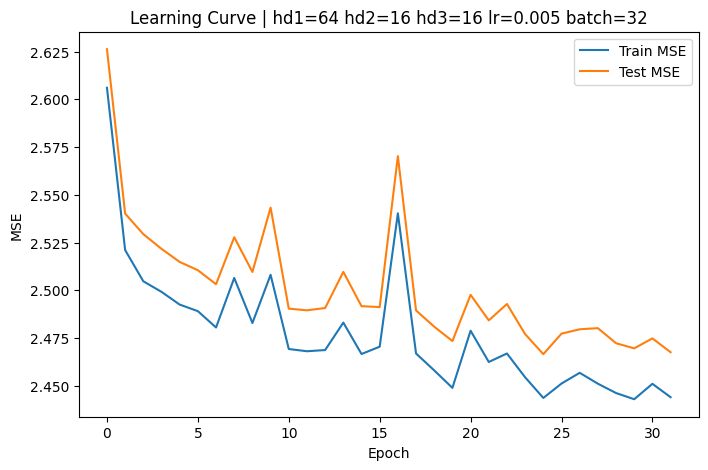


Deneme: hd1=64, hd2=16, hd3=16, lr=0.005, batch_size=64
Epoch 1/50 | Train MSE: 2.6093 | Test MSE: 2.6298
Epoch 2/50 | Train MSE: 2.6034 | Test MSE: 2.6242
Epoch 3/50 | Train MSE: 2.5357 | Test MSE: 2.5558
Epoch 4/50 | Train MSE: 2.5097 | Test MSE: 2.5340
Epoch 5/50 | Train MSE: 2.5111 | Test MSE: 2.5369
Epoch 6/50 | Train MSE: 2.5025 | Test MSE: 2.5271
Epoch 7/50 | Train MSE: 2.4938 | Test MSE: 2.5174
Epoch 8/50 | Train MSE: 2.4981 | Test MSE: 2.5193
Epoch 9/50 | Train MSE: 2.4901 | Test MSE: 2.5134
Epoch 10/50 | Train MSE: 2.5112 | Test MSE: 2.5421
Epoch 11/50 | Train MSE: 2.4835 | Test MSE: 2.5080
Epoch 12/50 | Train MSE: 2.4835 | Test MSE: 2.5067
Epoch 13/50 | Train MSE: 2.4812 | Test MSE: 2.5051
Epoch 14/50 | Train MSE: 2.4919 | Test MSE: 2.5186
Epoch 15/50 | Train MSE: 2.4845 | Test MSE: 2.5113
Epoch 16/50 | Train MSE: 2.4800 | Test MSE: 2.5045
Epoch 17/50 | Train MSE: 2.5147 | Test MSE: 2.5467
Epoch 18/50 | Train MSE: 2.4937 | Test MSE: 2.5169
Epoch 19/50 | Train MSE: 2.4784 | 

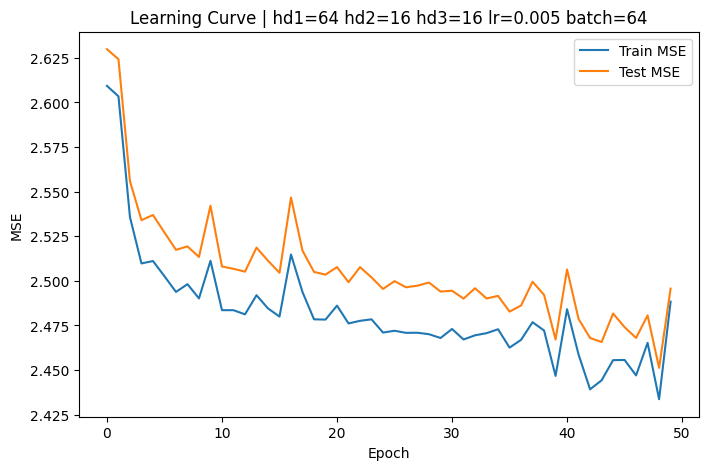


Deneme: hd1=64, hd2=16, hd3=16, lr=0.01, batch_size=32
Epoch 1/50 | Train MSE: 2.5386 | Test MSE: 2.5596
Epoch 2/50 | Train MSE: 2.5132 | Test MSE: 2.5362
Epoch 3/50 | Train MSE: 2.4977 | Test MSE: 2.5171
Epoch 4/50 | Train MSE: 2.4934 | Test MSE: 2.5147
Epoch 5/50 | Train MSE: 2.4874 | Test MSE: 2.5108
Epoch 6/50 | Train MSE: 2.4795 | Test MSE: 2.5041
Epoch 7/50 | Train MSE: 2.4787 | Test MSE: 2.5020
Epoch 8/50 | Train MSE: 2.4861 | Test MSE: 2.5056
Epoch 9/50 | Train MSE: 2.4650 | Test MSE: 2.4882
Epoch 10/50 | Train MSE: 2.5058 | Test MSE: 2.5443
Epoch 11/50 | Train MSE: 2.4631 | Test MSE: 2.4851
Epoch 12/50 | Train MSE: 2.4640 | Test MSE: 2.4921
Epoch 13/50 | Train MSE: 2.4661 | Test MSE: 2.4889
Epoch 14/50 | Train MSE: 2.5004 | Test MSE: 2.5277
Epoch 15/50 | Train MSE: 2.4683 | Test MSE: 2.4873
Epoch 16/50 | Train MSE: 2.4528 | Test MSE: 2.4778
Epoch 17/50 | Train MSE: 2.5944 | Test MSE: 2.6224
Epoch 18/50 | Train MSE: 2.4764 | Test MSE: 2.4966
Epoch 19/50 | Train MSE: 2.4798 | T

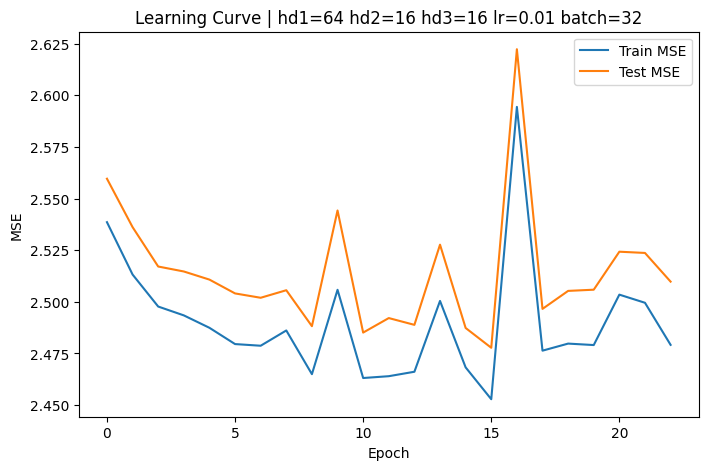


Deneme: hd1=64, hd2=16, hd3=16, lr=0.01, batch_size=64
Epoch 1/50 | Train MSE: 2.6057 | Test MSE: 2.6258
Epoch 2/50 | Train MSE: 2.5225 | Test MSE: 2.5408
Epoch 3/50 | Train MSE: 2.5041 | Test MSE: 2.5292
Epoch 4/50 | Train MSE: 2.5011 | Test MSE: 2.5234
Epoch 5/50 | Train MSE: 2.4928 | Test MSE: 2.5150
Epoch 6/50 | Train MSE: 2.4851 | Test MSE: 2.5064
Epoch 7/50 | Train MSE: 2.4827 | Test MSE: 2.5041
Epoch 8/50 | Train MSE: 2.4900 | Test MSE: 2.5109
Epoch 9/50 | Train MSE: 2.4783 | Test MSE: 2.5034
Epoch 10/50 | Train MSE: 2.5077 | Test MSE: 2.5436
Epoch 11/50 | Train MSE: 2.4712 | Test MSE: 2.4936
Epoch 12/50 | Train MSE: 2.4689 | Test MSE: 2.4909
Epoch 13/50 | Train MSE: 2.4656 | Test MSE: 2.4859
Epoch 14/50 | Train MSE: 2.4929 | Test MSE: 2.5219
Epoch 15/50 | Train MSE: 2.4761 | Test MSE: 2.5019
Epoch 16/50 | Train MSE: 2.4585 | Test MSE: 2.4799
Epoch 17/50 | Train MSE: 2.5637 | Test MSE: 2.5934
Epoch 18/50 | Train MSE: 2.4679 | Test MSE: 2.4914
Epoch 19/50 | Train MSE: 2.4663 | T

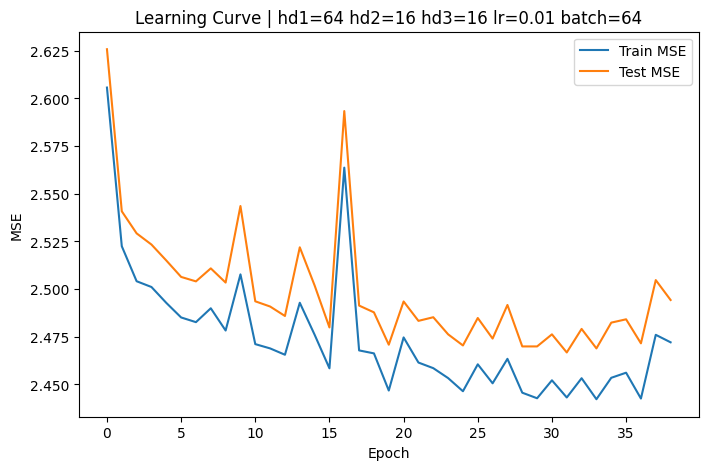

In [8]:
for hd1 in hidden_dim1_list:
    for hd2 in hidden_dim2_list:
        for hd3 in hidden_dim3_list:
            for lr in lr_list:
                for batch_size in batch_size_list:

                    print(f"\nDeneme: hd1={hd1}, hd2={hd2}, hd3={hd3}, lr={lr}, batch_size={batch_size}")

                    np.random.seed(42)
                    W1 = np.random.randn(X1_train_scaled.shape[1], hd1) * 0.01
                    b1 = np.zeros((1, hd1))
                    W2 = np.random.randn(hd1 + X2_train.shape[1], hd2) * 0.01
                    b2 = np.zeros((1, hd2))
                    W3 = np.random.randn(hd2, hd3) * 0.01
                    b3 = np.zeros((1, hd3))
                    W4 = np.random.randn(hd3, 1) * 0.01
                    b4 = np.zeros((1, 1))

                    best_test_mse = float('inf')
                    patience_counter = 0
                    train_mse_list, test_mse_list = [], []

                    for epoch in range(epochs):
                        permutation = np.random.permutation(X1_train_scaled.shape[0])
                        X1_sh, X2_sh, y_sh = X1_train_scaled[permutation], X2_train[permutation], y_train[permutation]

                        for i in range(0, X1_train_scaled.shape[0], batch_size):
                            X1_b = X1_sh[i:i+batch_size]
                            X2_b = X2_sh[i:i+batch_size]
                            y_b  = y_sh[i:i+batch_size].reshape(-1, 1)

                            Z1 = X1_b.dot(W1) + b1
                            A1 = relu(Z1)

                            A1_cat = np.concatenate([A1, X2_b], axis=1)
                            Z2 = A1_cat.dot(W2) + b2
                            A2 = relu(Z2)

                            Z3 = A2.dot(W3) + b3
                            A3 = relu(Z3)

                            Z4 = A3.dot(W4) + b4
                            y_pred = Z4

                            dZ4 = 2 * (y_pred - y_b) / y_b.shape[0]
                            dW4 = A3.T.dot(dZ4)
                            db4 = np.sum(dZ4, axis=0, keepdims=True)

                            dA3 = dZ4.dot(W4.T)
                            dZ3 = dA3 * relu_derivative(Z3)
                            dW3 = A2.T.dot(dZ3)
                            db3 = np.sum(dZ3, axis=0, keepdims=True)

                            dA2 = dZ3.dot(W3.T)
                            dZ2 = dA2 * relu_derivative(Z2)
                            dW2 = A1_cat.T.dot(dZ2)
                            db2 = np.sum(dZ2, axis=0, keepdims=True)

                            dA1_cat = dZ2.dot(W2.T)
                            dA1 = dA1_cat[:, :A1.shape[1]]
                            dZ1 = dA1 * relu_derivative(Z1)
                            dW1 = X1_b.T.dot(dZ1)
                            db1 = np.sum(dZ1, axis=0, keepdims=True)

                            W4 -= lr * dW4
                            b4 -= lr * db4
                            W3 -= lr * dW3
                            b3 -= lr * db3
                            W2 -= lr * dW2
                            b2 -= lr * db2
                            W1 -= lr * dW1
                            b1 -= lr * db1

                        Z1_train = X1_train_scaled.dot(W1) + b1
                        A1_train = relu(Z1_train)
                        A1_cat_train = np.concatenate([A1_train, X2_train], axis=1)
                        Z2_train = A1_cat_train.dot(W2) + b2
                        A2_train = relu(Z2_train)
                        Z3_train = A2_train.dot(W3) + b3
                        A3_train = relu(Z3_train)
                        y_train_pred = A3_train.dot(W4) + b4
                        final_train = np.mean((y_train - y_train_pred.flatten())**2)

                        Z1_test = X1_test_scaled.dot(W1) + b1
                        A1_test = relu(Z1_test)
                        A1_cat_test = np.concatenate([A1_test, X2_test], axis=1)
                        Z2_test = A1_cat_test.dot(W2) + b2
                        A2_test = relu(Z2_test)
                        Z3_test = A2_test.dot(W3) + b3
                        A3_test = relu(Z3_test)
                        y_test_pred = A3_test.dot(W4) + b4
                        final_test = np.mean((y_test - y_test_pred.flatten())**2)

                        train_mse_list.append(final_train)
                        test_mse_list.append(final_test)

                        print(f"Epoch {epoch+1}/{epochs} | Train MSE: {final_train:.4f} | Test MSE: {final_test:.4f}")

                        if final_test < best_test_mse:
                            best_test_mse = final_test
                            best_W1, best_b1, best_W2, best_b2 = W1.copy(), b1.copy(), W2.copy(), b2.copy()
                            best_W3, best_b3, best_W4, best_b4 = W3.copy(), b3.copy(), W4.copy(), b4.copy()
                            patience_counter = 0
                        else:
                            patience_counter += 1
                            if patience_counter >= patience:
                                print(f"Early stopping at epoch {epoch+1}")
                                break

                    print(f"Kombinasyon En iyi Test MSE: {best_test_mse:.4f}")

                    if best_test_mse < best_mse_global:
                        best_mse_global = best_test_mse
                        best_config = (hd1, hd2, hd3, lr, batch_size)
                        final_W1, final_b1 = best_W1, best_b1
                        final_W2, final_b2 = best_W2, best_b2
                        final_W3, final_b3 = best_W3, best_b3
                        final_W4, final_b4 = best_W4, best_b4

                    plt.figure(figsize=(8,5))
                    plt.plot(train_mse_list, label='Train MSE')
                    plt.plot(test_mse_list, label='Test MSE')
                    plt.title(f'Learning Curve | hd1={hd1} hd2={hd2} hd3={hd3} lr={lr} batch={batch_size}')
                    plt.xlabel('Epoch')
                    plt.ylabel('MSE')
                    plt.legend()
                    plt.show()


4- EN İYİ SONUÇ & MODEL KAYDET

In [9]:
print(f"\n=== EN İYİ KONFİGÜRASYON ===\nhd1={best_config[0]}, hd2={best_config[1]}, hd3={best_config[2]}, lr={best_config[3]}, batch_size={best_config[4]}")
print(f"En düşük Test MSE: {best_mse_global:.4f}")

np.save('models/201_W1.npy', final_W1)
np.save('models/201_b1.npy', final_b1)
np.save('models/201_W2.npy', final_W2)
np.save('models/201_b2.npy', final_b2)
np.save('models/201_W3.npy', final_W3)
np.save('models/201_b3.npy', final_b3)
np.save('models/201_W4.npy', final_W4)
np.save('models/201_b4.npy', final_b4)

print("En iyi grid search ağırlıkları 'models/' klasörüne kaydedildi.")



=== EN İYİ KONFİGÜRASYON ===
hd1=32, hd2=16, hd3=16, lr=0.01, batch_size=64
En düşük Test MSE: 2.4376
En iyi grid search ağırlıkları 'models/' klasörüne kaydedildi.
